# A Walk Through Linear Models
*Complete and hand in this completed worksheet (including its outputs and any supporting code outside of the worksheet) with your assignment submission. Please check the pdf file for more details.*

In this exercise you will:
    
- implement a whole bunch of **linear classifiers**
- compare their performance and properties

Please note that **YOU CANNOT USE ANY MACHINE LEARNING PACKAGE SUCH AS SKLEARN** for any homework, unless you are asked. 

In [2]:
# some basic imports
import numpy as np
import scipy
import matplotlib.pyplot as plt
from mkdata import mkdata
from plotdata import plotdata

%matplotlib inline

%load_ext autoreload
%autoreload 2

ModuleNotFoundError: ignored

### def mktestdata(w, N, noisy=False)
- use np.random to make random test data, parameter **noisy** for noisy condition
- INPUT:  **w**: the weighted vector of the true classification; **N**: the number of dataset
- OUTPUT: return the data **X** and label **y** 


### def cal_error(w, x, y)
- use calculated weighted vector **w**, data **X** and true label **y** to calculate the error number percentage
- INPUT:  **w**: the weighted vector we learnt from the training data, **X**: dataset, **y**: true label
- OUTPUT: return the error number percentage 


In [ ]:
def mktestdata(w, N, noisy=False):
    data_range = np.array([-1, 1])
    dim = 2
    X = np.random.random((dim, N)) * (data_range[1] - data_range[0]) + data_range[0]
    Xsample = np.vstack((np.ones((1, N)), X))
    y = w.T.dot(Xsample)
    y = (y > 0).astype(int) * 2 - 1
    if noisy:
        idx = np.random.choice(N, N//10)
        y[0, idx] = -y[0, idx]
    return X, y

def cal_error(w, X, y):
    N = X.shape[1]
    pred = w.T.dot(np.vstack((np.ones((1, X.shape[1])), X)))
    error = (((pred > 0).astype(int) * 2 - 1) != y).sum() / N
    return error

You can use this skeleton or write your own.

NOTE: Be becareful that the bias term is in the first element of weight, that is `y = np.sign(np.matmul(w_g.T, np.vstack((np.ones((1, X.shape[1])), X)))).T`

### Part1: Preceptron

E_train is 3.8200%, E_test is 5.0652%
Average number of iterations is 4.07.


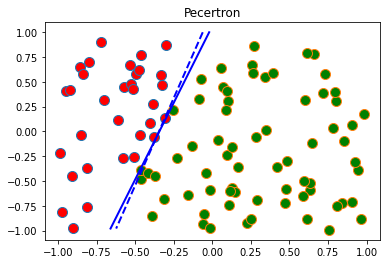

In [ ]:
from perceptron import perceptron

nRep = 100 # number of replicates
nTrain = 100 # number of training data
iteration = 0
E_train = 0
E_test = 0
for i in range(nRep):
    X, y, w_f = mkdata(nTrain)
    w_g, iters = perceptron(X, y)
    iteration += iters 
    Xt, yt = mktestdata(w_f, nTrain**2)
    # Compute training, testing error
    # Sum up number of iterations

    error_train = cal_error(w_g, X, y)
    error_test = cal_error(w_g, Xt, yt)
    E_train += error_train / nRep
    E_test += error_test / nRep

avgIter = iteration / nRep
print('E_train is {:.4f}%, E_test is {:.4f}%'.format(E_train*100, E_test*100))
print('Average number of iterations is {}.'.format(avgIter))
plotdata(X, y, w_f, w_g, 'Pecertron')

### Part2: Preceptron: Non-linearly separable case

E_train is 13.0000%, E_test is 16.2500%
Average number of iterations is 1001.


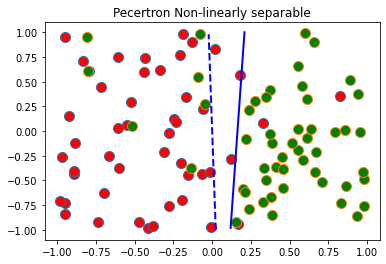

In [ ]:
nTrain = 100 # number of training data


X, y, w_f = mkdata(nTrain, 'noisy')
w_g, iters = perceptron(X, y)
Xt, yt = mktestdata(w_f, nTrain**2, noisy=True)


E_train = cal_error(w_g, X, y)
E_test = cal_error(w_g, Xt, yt)
avgIter = iters  # in the perceptron function I set a iteration threshold of 1000 to prevent the endless loop 

print('E_train is {:.4f}%, E_test is {:.4f}%'.format(E_train*100, E_test*100))
print('Average number of iterations is {}.'.format(avgIter))
plotdata(X, y, w_f, w_g, 'Pecertron Non-linearly separable')


### Part3: Linear Regression

E_train is 3.9750%, E_test is 4.8785%


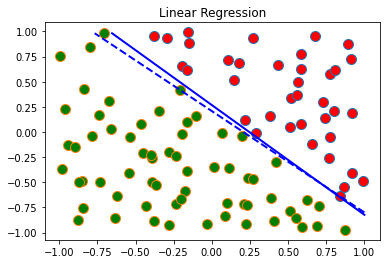

In [ ]:
from linear_regression import linear_regression

nRep = 1000  # number of replicates
nTrain = 100 # number of training data
E_train = 0
E_test = 0

for i in range(nRep):
    X, y, w_f = mkdata(nTrain)
    w_g = linear_regression(X, y)
    Xt, yt = mktestdata(w_f, nTrain**2)

    error_train = cal_error(w_g, X, y)
    error_test = cal_error(w_g, Xt, yt)
    E_train += error_train / nRep
    E_test += error_test / nRep
    # Compute training, testing error

print('E_train is {:.4f}%, E_test is {:.4f}%'.format(E_train*100, E_test*100))

plotdata(X, y, w_f, w_g, 'Linear Regression');


## Part4: Linear Regression: noisy

E_train is 13.2690%, E_test is 14.3314%


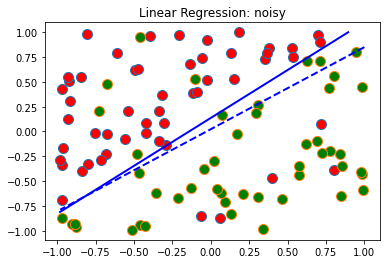

In [ ]:

nRep = 1000; # number of replicates
nTrain = 100; # number of training data
E_train = 0
E_test = 0

for i in range(nRep):
    X, y, w_f = mkdata(nTrain, 'noisy')
    w_g = linear_regression(X, y);
    Xt, yt = mktestdata(w_f, nTrain**2, noisy=True)
    # Compute training, testing error

    error_train = cal_error(w_g, X, y)
    error_test = cal_error(w_g, Xt, yt)
    E_train += error_train / nRep
    E_test += error_test / nRep

print('E_train is {:.4f}%, E_test is {:.4f}%'.format(E_train*100, E_test*100))

plotdata(X, y, w_f, w_g, 'Linear Regression: noisy');

## Part5: Linear Regression: poly_fit

In [ ]:
import scipy.io as sio
poly_train = sio.loadmat('poly_train')
X, y = poly_train['X'], poly_train['y']
poly_test = sio.loadmat('poly_test')
X_test, y_test = poly_test['X_test'], poly_test['y_test']
w = linear_regression(X, y)
# Compute training, testing error
E_train = 0
E_test = 0

E_train = cal_error(w, X, y)
E_test = cal_error(w, X_test, y_test)
print('E_train is {:.4f}%, E_test is {:.4f}%'.format(E_train*100, E_test*100))

# poly_fit with transform

X_t = np.vstack((X, X[0,:]*X[1,:], X[0,:]**2, X[1,:]**2))  # CHANGE THIS LINE TO DO TRANSFORMATION
X_test_t = np.vstack((X_test, X_test[0,:]*X_test[1,:], X_test[0,:]**2, X_test[1,:]**2))  # CHANGE THIS LINE TO DO TRANSFORMATION

w = linear_regression(X_t, y)

E_train = cal_error(w, X_t, y)
E_test = cal_error(w, X_test_t, y_test)


# Compute training, testing error
print('E_train is {:.4f}%, E_test is {:.4f}%'.format(E_train*100, E_test*100))

E_train is 49.0000%, E_test is 54.9600%
E_train is 5.0000%, E_test is 6.6000%


## Part6: Logistic Regression

E_train is 2.9000%, E_test is 4.2382%


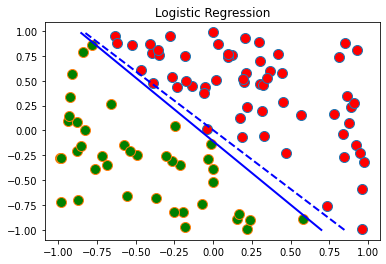

In [ ]:
from logistic import logistic

# Since logistic regression outputs 0/1, we should adjust the label y.
nRep = 50; # number of replicates
nTrain = 100; # number of training data
E_train = 0
E_test = 0

for i in range(nRep):
    X, y, w_f = mkdata(nTrain)
    w_g = logistic(X, y);
    Xt, yt = mktestdata(w_f, nTrain**2)
    # Compute training, testing error
    error_train = cal_error(w_g, X, y)
    error_test = cal_error(w_g, Xt, yt)
    E_train += error_train / nRep
    E_test += error_test / nRep

print('E_train is {:.4f}%, E_test is {:.4f}%'.format(E_train*100, E_test*100))

plotdata(X, y, w_f, w_g, 'Logistic Regression')

## Part7: Logistic Regression: noisy

E_train is 25.1800%, E_test is 23.8200%


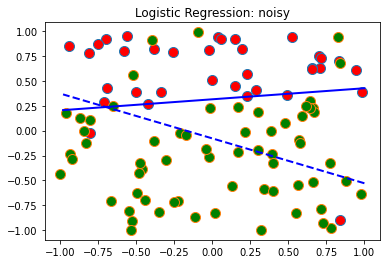

In [ ]:

# Since logistic regression outputs 0/1, we should adjust the label y.
nRep = 50; # number of replicates
nTrain = 100; # number of training data
nTest = 100; # number of training data
E_train = 0
E_test = 0

for i in range(nRep):
    X, y, w_f = mkdata(nTrain, 'noisy')
    w_g = logistic(X, y)
    Xt, yt = mktestdata(w_f, nTest, noisy=True)
    # Compute training, testing error
    error_train = cal_error(w_g, X, y)
    error_test = cal_error(w_g, Xt, yt)
    E_train += error_train / nRep
    E_test += error_test / nRep

print('E_train is {:.4f}%, E_test is {:.4f}%'.format(E_train*100, E_test*100))

plotdata(X, y, w_f, w_g, 'Logistic Regression: noisy')

## Part8: SVM

E_train is 0.0000%, E_test is 1.0636%
Average number of support vectors is 3.00.


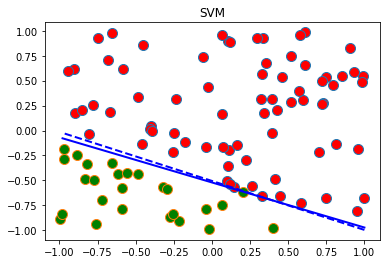

In [ ]:
from svm import svm

nRep = 1000; # number of replicates
nTrain = 100; # number of training data
E_train = 0
E_test = 0
avgNum = 0

for i in range(nRep):
    X, y, w_f = mkdata(nTrain)
    w_g, num_sc = svm(X, y.squeeze())
    Xt, yt = mktestdata(w_f, nTrain**2)
    # Compute training, testing error
    error_train = cal_error(w_g, X, y)
    error_test = cal_error(w_g, Xt, yt)
    E_train += error_train / nRep
    E_test += error_test / nRep
    # Sum up number of support vectors
    avgNum += num_sc / nRep

print('E_train is {:.4f}%, E_test is {:.4f}%'.format(E_train*100, E_test*100))
print('Average number of support vectors is {:.2f}.'.format(avgNum))
plotdata(X, y, w_f, w_g, 'SVM')

You can also try SVM with **noisy** training data. Why it behaves poorly? 
You can also try to implement SVM with **slack variables**.  See how it behaves with noisy training data. However this is left as a bonus part.

# Part9: SVM: noisy

In [1]:
from svm import svm

nRep = 100; # number of replicates
nTrain = 100; # number of training data
E_train = 0
E_test = 0
avgNum = 0

for i in range(nRep):
    X, y, w_f = mkdata(nTrain, 'noisy')
    w_g, num_sc = svm(X, y.squeeze(), noisy=True)
    Xt, yt = mktestdata(w_f, nTrain**2, noisy=True)
    # Compute training, testing error
    error_train = cal_error(w_g, X, y)
    error_test = cal_error(w_g, Xt, yt)
    E_train += error_train / nRep
    E_test += error_test / nRep
    # Sum up number of support vectors
    avgNum += num_sc / nRep

print('E_train is {:.4f}%, E_test is {:.4f}%'.format(E_train*100, E_test*100))
print('Average number of support vectors is {:.2f}.'.format(avgNum))
plotdata(X, y, w_f, w_g, 'SVM: noisy')

ModuleNotFoundError: ignored